# LAB PROJECT 1( REGRESSION )

## 📘 Introduction

This lab project focuses on solving a **regression problem** using Python and machine learning libraries. The notebook walks through the process of loading data, preprocessing it, and applying regression algorithms to predict outcomes.

**Objectives:**
- Load and explore real-world data  
- Apply data preprocessing (handling missing values, feature scaling)  
- Train and evaluate regression models (e.g., Linear Regression, Decision Trees)  
- Visualize results and performance metrics  

This notebook serves as a practical guide to supervised learning and regression analysis in machine learning.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [5]:
df=pd.read_csv("D:/laptop_data_cleaned.csv")

**1. Check & Handle Missing Values**

In [6]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

There are no missing values in this dataset

**2. Normalization (Min-Max Scaling)**

In [7]:
minmax_scaler = MinMaxScaler()
df_norm = df.copy()
df_norm[['Weight', 'Price', 'Ppi']] = minmax_scaler.fit_transform(df[['Weight', 'Price', 'Ppi']])

**3. Standardization (Z-score Scaling)**

In [8]:
std_scaler = StandardScaler()
df_std = df.copy()
df_std[['Weight', 'Price', 'Ppi']] = std_scaler.fit_transform(df[['Weight', 'Price', 'Ppi']])

**4. Data Visualization**

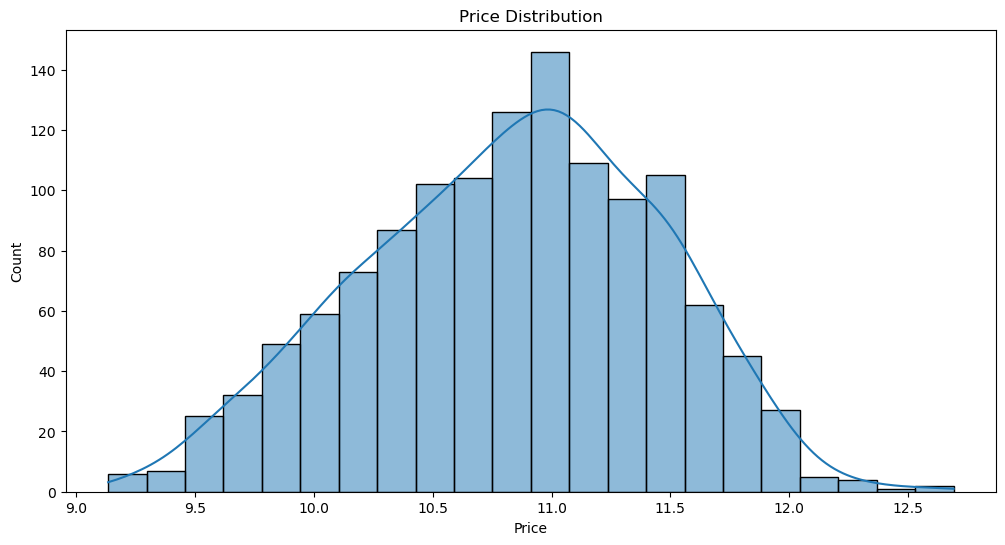

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

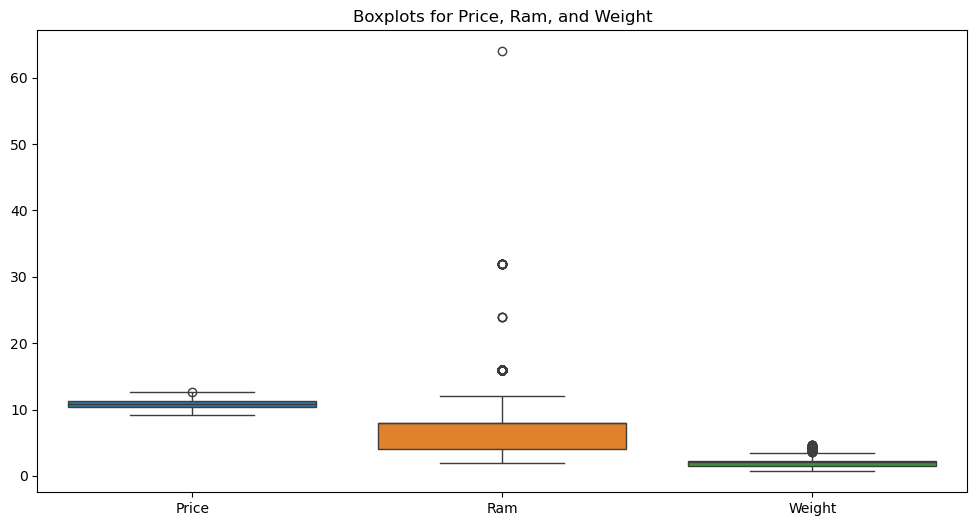

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Price', 'Ram', 'Weight']])
plt.title("Boxplots for Price, Ram, and Weight")
plt.show()

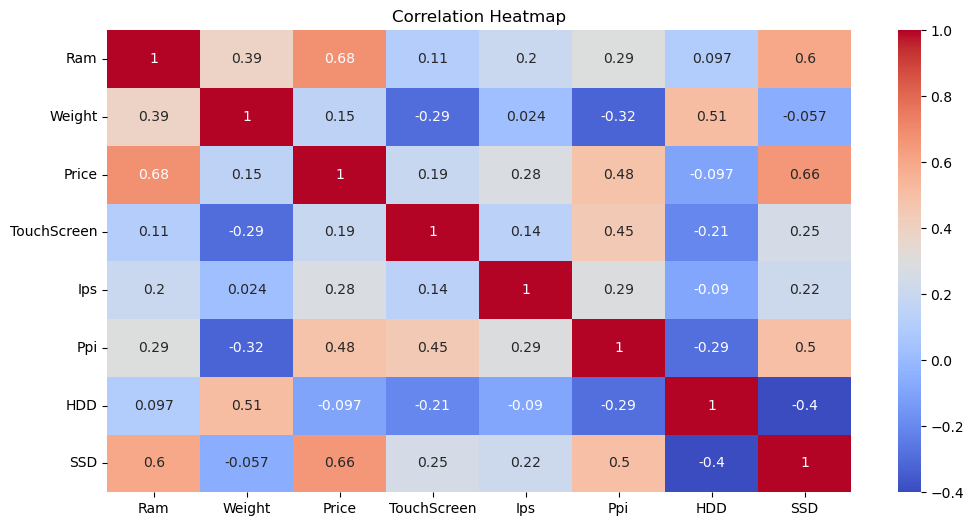

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Preprocessing - Correlation, Outlier Detection, Feature Engineering, Data Splitting

In [12]:
from sklearn.model_selection import train_test_split

**1. Correlation**

In [13]:
correlation = df.corr(numeric_only=True)
print("Correlation matrix:\n", correlation)

Correlation matrix:
                   Ram    Weight     Price  TouchScreen       Ips       Ppi  \
Ram          1.000000  0.389134  0.680519     0.113316  0.202809  0.294927   
Weight       0.389134  1.000000  0.151386    -0.292288  0.023966 -0.319499   
Price        0.680519  0.151386  1.000000     0.194289  0.279240  0.480687   
TouchScreen  0.113316 -0.292288  0.194289     1.000000  0.136973  0.452107   
Ips          0.202809  0.023966  0.279240     0.136973  1.000000  0.288833   
Ppi          0.294927 -0.319499  0.480687     0.452107  0.288833  1.000000   
HDD          0.097340  0.510876 -0.097361    -0.205105 -0.090411 -0.290774   
SSD          0.599552 -0.056985  0.658808     0.252142  0.215197  0.499899   

                  HDD       SSD  
Ram          0.097340  0.599552  
Weight       0.510876 -0.056985  
Price       -0.097361  0.658808  
TouchScreen -0.205105  0.252142  
Ips         -0.090411  0.215197  
Ppi         -0.290774  0.499899  
HDD          1.000000 -0.400625  
SSD 

**2. Outlier Detection (using IQR method on 'Price')**

In [14]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Price': {len(outliers)}")

Number of outliers in 'Price': 1


**3. Feature Engineering: Total Storage**

In [15]:
df['Total_Storage'] = df['HDD'] + df['SSD']

**4. Encoding Categorical Features**

In [16]:
df_encoded = pd.get_dummies(df, columns=['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'], drop_first=True)

**5. Splitting data**

In [17]:
X = df_encoded.drop(['Price'], axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Linear & Multiple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


**Linear Regression using 'Ram' only**

In [19]:
lr_simple = LinearRegression()
lr_simple.fit(X_train[['Ram']], y_train)
y_pred_simple = lr_simple.predict(X_test[['Ram']])
print("Simple Linear Regression R2 Score:", r2_score(y_test, y_pred_simple))

Simple Linear Regression R2 Score: 0.5223642995889155


**Prepare a simplified version for visual linear regression (using 'Ram' for simple regression)**

In [23]:
X_simple = df[['Ram']]
y = df['Price']
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

**Fit simple linear regression**

In [24]:
lr_simple = LinearRegression()
lr_simple.fit(X_train_simple, y_train_simple)
y_pred_simple = lr_simple.predict(X_test_simple)

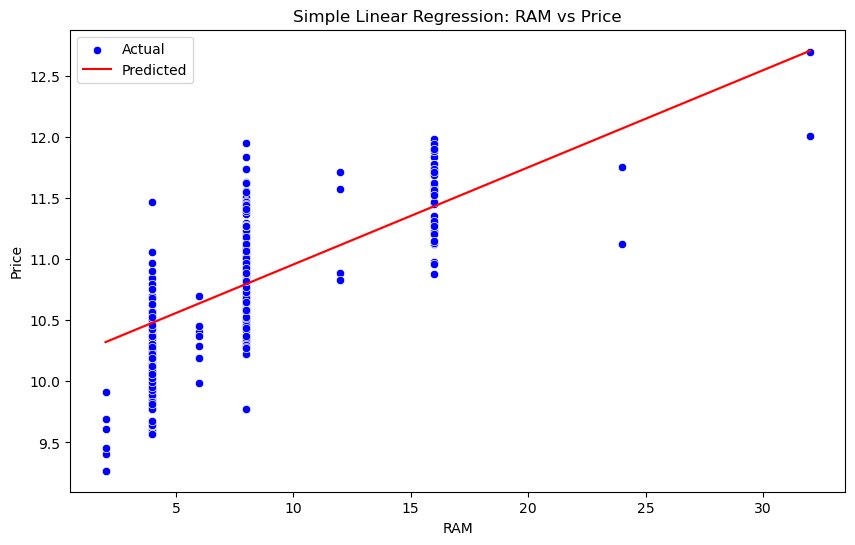

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple['Ram'], y=y_test_simple, label="Actual", color='blue')
sns.lineplot(x=X_test_simple['Ram'], y=y_pred_simple, label="Predicted", color='red')
plt.title("Simple Linear Regression: RAM vs Price")
plt.xlabel("RAM")
plt.ylabel("Price")
plt.legend()
plt.show()

***visualization of the Simple Linear Regression model using RAM vs Price:
Blue Dots: Actual laptop prices from the test set.
Red Line: Predicted prices from the model.***

**Multiple Linear Regression using all features**

In [21]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)
print("Multiple Linear Regression R2 Score:", r2_score(y_test, y_pred_multi))

Multiple Linear Regression R2 Score: 0.8048230696726355


# Logistic Regression (binary classification on TouchScreen), Evaluation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**Target: TouchScreen (binary)**

In [27]:
X_bin = df_encoded.drop(['TouchScreen'], axis=1)
y_bin = df_encoded['TouchScreen']

In [28]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

**Logistic Regression**

In [30]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train_bin, y_train_bin)
y_pred_bin = logreg.predict(X_test_bin)

In [31]:
print("Classification Report:\n", classification_report(y_test_bin, y_pred_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_bin))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       216
           1       0.91      0.74      0.82        39

    accuracy                           0.95       255
   macro avg       0.93      0.86      0.89       255
weighted avg       0.95      0.95      0.95       255

Confusion Matrix:
 [[213   3]
 [ 10  29]]


**Model Evaluation Metrics for regression model**

In [32]:
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("MSE:", mean_squared_error(y_test, y_pred_multi))
print("R² Score:", r2_score(y_test, y_pred_multi))

MAE: 0.21518662588026902
MSE: 0.07731419651730932
R² Score: 0.8048230696726355
